## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize

## Importing dataset

In [2]:
train_dataset = pd.read_csv('../input/covid19-global-forecasting-week-4/train.csv')
test_dataset = pd.read_csv('../input/covid19-global-forecasting-week-4/test.csv')
submission = pd.read_csv('../input/covid19-global-forecasting-week-4/submission.csv')

In [3]:
submission.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


## View information about the dataset.

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28796 entries, 0 to 28795
Data columns (total 6 columns):
Id                28796 non-null int64
Province_State    12236 non-null object
Country_Region    28796 non-null object
Date              28796 non-null object
ConfirmedCases    28796 non-null float64
Fatalities        28796 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.3+ MB


In [5]:
train_dataset.describe()

,Id,ConfirmedCases,Fatalities
count,28796.000000,28796.000000,28796.000000
mean,17830.500000,1727.536984,101.523232
std,10300.666674,11261.712561,1001.590412
min,1.000000,0.000000,0.000000
25%,8915.750000,0.000000,0.000000
50%,17830.500000,3.000000,0.000000
75%,26745.250000,183.000000,2.000000
max,35660.000000,263292.000000,25085.000000


In [6]:
train_dataset.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [7]:
test_dataset.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06


In [8]:
train_dataset.isna().sum()

Id                    0
Province_State    16560
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [9]:
test_dataset.isna().sum()

ForecastId           0
Province_State    7740
Country_Region       0
Date                 0
dtype: int64

## Combine **'Province_State'** and **'Country_Region'**

In [10]:
train_dataset['Province_State'].fillna('', inplace = True)
test_dataset['Province_State'].fillna('', inplace = True)

In [11]:
train_dataset['Country_Region'] = train_dataset['Country_Region'] + ' ' + train_dataset['Province_State']
test_dataset['Country_Region'] = test_dataset['Country_Region'] + ' ' + test_dataset['Province_State']
del train_dataset['Province_State']
del test_dataset['Province_State']

In [12]:
train_dataset.head()

,Id,Country_Region,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,2020-01-26,0.0,0.0


In [13]:
test_dataset.head()

,ForecastId,Country_Region,Date
0,1,Afghanistan,2020-04-02
1,2,Afghanistan,2020-04-03
2,3,Afghanistan,2020-04-04
3,4,Afghanistan,2020-04-05
4,5,Afghanistan,2020-04-06


In [14]:
# How many countries
train_dataset['Country_Region'].describe()

count         28796
unique          313
top       Slovenia 
freq             92
Name: Country_Region, dtype: object

In [15]:
country_list = train_dataset['Country_Region'].unique()

In [16]:
train_date = train_dataset.Date.unique()
train_date

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [17]:
test_date = test_dataset.Date.unique()
test_date

array(['2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
       '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
       '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
       '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
       '2020-05-12', '2020-05-13', '2020-05-14'], dtype=object)

In [18]:
train_days = np.arange(len(train_date))
train_days

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91])

In [19]:
train_days[train_date == '2020-04-02']

array([71])

In [20]:
train_days[train_date == '2020-04-22']

array([91])

In [21]:
test_days = np.arange(len(test_date)) + 71
test_days

array([ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113])

In [22]:
train_end = train_days[train_date == '2020-04-22']
test_start = test_days[0]

In [23]:
train_end

array([91])

In [24]:
test_start

71

In [25]:
Day = np.zeros(len(train_dataset))
for ii in range(len(train_date)):
    Day[train_dataset.Date == train_date[ii]] = train_days[ii]
train_dataset['Day'] = Day

In [26]:
train_dataset.head(5)

,Id,Country_Region,Date,ConfirmedCases,Fatalities,Day
0,1,Afghanistan,2020-01-22,0.0,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0,1.0
2,3,Afghanistan,2020-01-24,0.0,0.0,2.0
3,4,Afghanistan,2020-01-25,0.0,0.0,3.0
4,5,Afghanistan,2020-01-26,0.0,0.0,4.0


In [27]:
Day = np.zeros(len(test_dataset))
for ii in range(len(test_date)):
    Day[test_dataset.Date == test_date[ii]] = test_days[ii]
test_dataset['Day'] = Day

In [28]:
test_dataset.head(5)

,ForecastId,Country_Region,Date,Day
0,1,Afghanistan,2020-04-02,71.0
1,2,Afghanistan,2020-04-03,72.0
2,3,Afghanistan,2020-04-04,73.0
3,4,Afghanistan,2020-04-05,74.0
4,5,Afghanistan,2020-04-06,75.0


## Top 10 confirmed cases countries (2020-04-22)

In [29]:
top_comfirmedcases = train_dataset[train_dataset.Date == '2020-04-22'].sort_values(by = 'ConfirmedCases', ascending = False)
top_comfirmedcases.head(10)

,Id,Country_Region,Date,ConfirmedCases,Fatalities,Day
24931,30872,US New York,2020-04-22,263292.0,19413.0,91.0
20515,25400,Spain,2020-04-22,208389.0,21717.0,91.0
13523,16736,Italy,2020-04-22,187327.0,25085.0,91.0
11407,14114,France,2020-04-22,155860.0,21340.0,91.0
11775,14570,Germany,2020-04-22,150648.0,5279.0,91.0
28059,34748,United Kingdom,2020-04-22,133495.0,18100.0,91.0
21803,26996,Turkey,2020-04-22,98674.0,2376.0,91.0
24747,30644,US New Jersey,2020-04-22,95914.0,5150.0,91.0
13155,16280,Iran,2020-04-22,85996.0,5391.0,91.0
6255,7730,China Hubei,2020-04-22,68128.0,4512.0,91.0


In [30]:
def country_plot(country):
    train = train_dataset[train_dataset['Country_Region'] == country]
    test = test_dataset[test_dataset['Country_Region'] == country]
    
    # X_train
    x_train = train.Day.values
    confirmed_train = train.ConfirmedCases.values
    fatalities_train = train.Fatalities.values
    
    # Plot figures
    # Confirmed cases
    plt.figure(figsize = (15, 3))
    plt.subplot(1, 2, 1)
    plt.xlabel('Days')
    plt.ylabel('Confirmed cases')
    plt.title(country)
    plt.plot(x_train, confirmed_train)
    plt.grid()

    # Fatalities
    plt.subplot(1, 2, 2)
    plt.xlabel('Days')
    plt.ylabel('Fatalities')
    plt.title(country)
    plt.plot(x_train, fatalities_train, color = 'orange')
    plt.grid()
    plt.show()

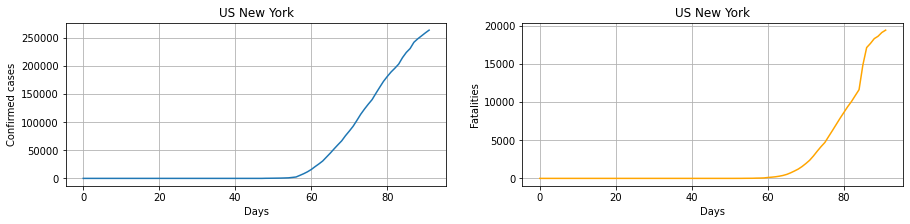

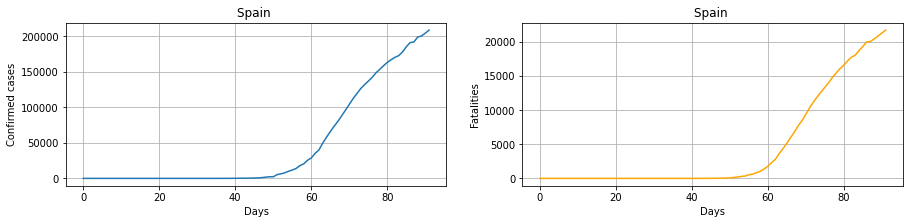

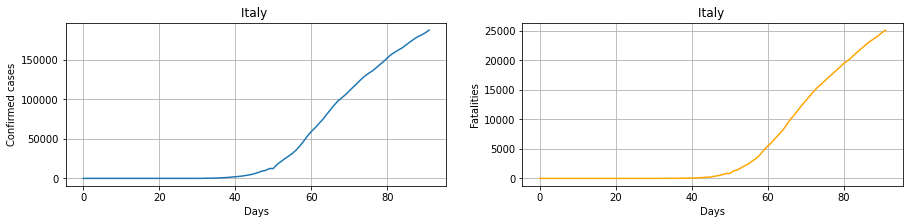

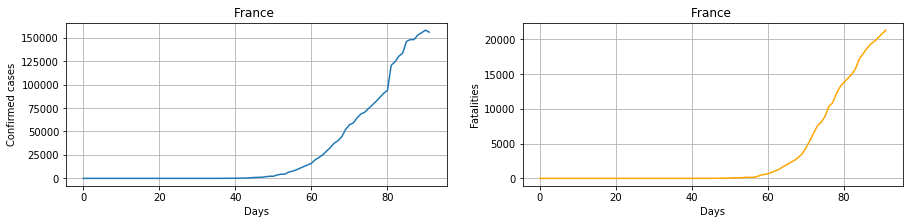

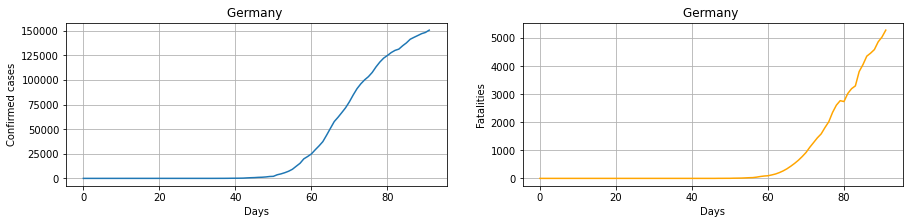

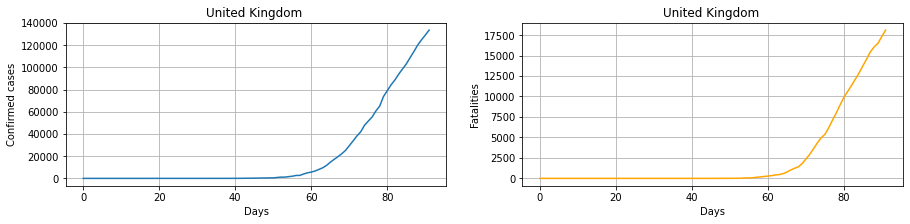

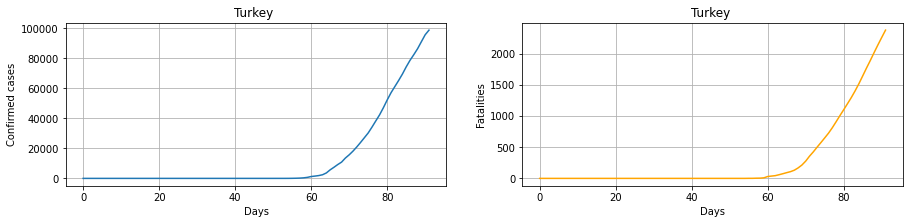

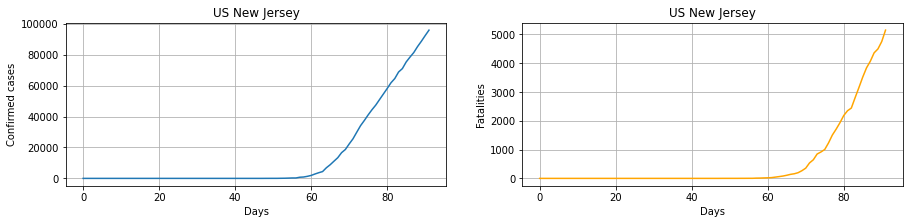

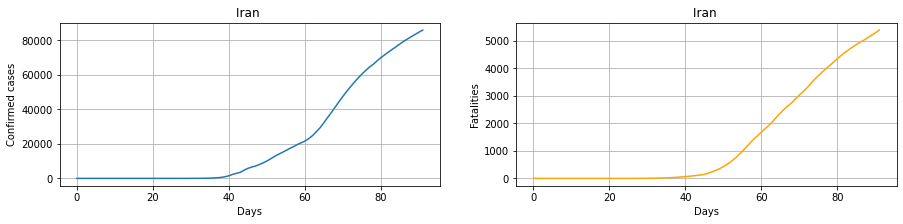

In [31]:
for country in top_comfirmedcases.Country_Region[0:9].values:
    country_plot(country)

## Gompertz model

$$f(t) = \theta_{1} e^{-\theta_{2} e^{-\theta_{3} t}}$$

where

- $\theta_{1}$ is an asymptote, since $\lim_{t \to \infty} f(t) = \theta_{1}$ 
- $\theta_{2}$ sets the displacement along the x-axis (translates the graph to the left or right). Symmetry is when $\theta_{2} = \log(2)$.
- $\theta_{3}$ sets the growth rate (y scaling)

Reference: [wiki](https://en.wikipedia.org/wiki/Gompertz_function)

In [32]:
def Gompertz(t, theta1, theta2, theta3):
    '''
    theta1: The asymptote.
    theta2: The displacement along the x-axis.
    theta3: The growth rate.
    '''
    f = theta1 * np.exp(-theta2 * np.exp(-theta3 * t))
    return f

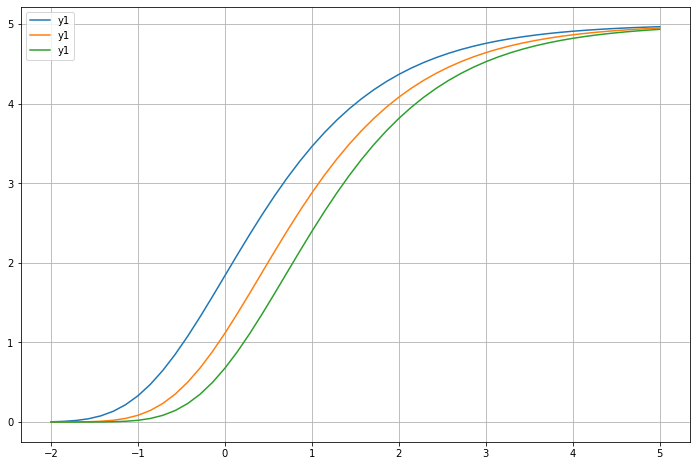

In [33]:
x = np.linspace(start = -2, stop = 5, num = 50)
y1 = Gompertz(x, theta1 = 5, theta2 = 1, theta3 = 1)
y2 = Gompertz(x, theta1 = 5, theta2 = 1.5, theta3 = 1)
y3 = Gompertz(x, theta1 = 5, theta2 = 2, theta3 = 1)

plt.figure(figsize = (12, 8))
plt.plot(x, y1, label = 'y1')
plt.plot(x, y2, label = 'y1')
plt.plot(x, y3, label = 'y1')
plt.legend()
plt.grid()
plt.show()

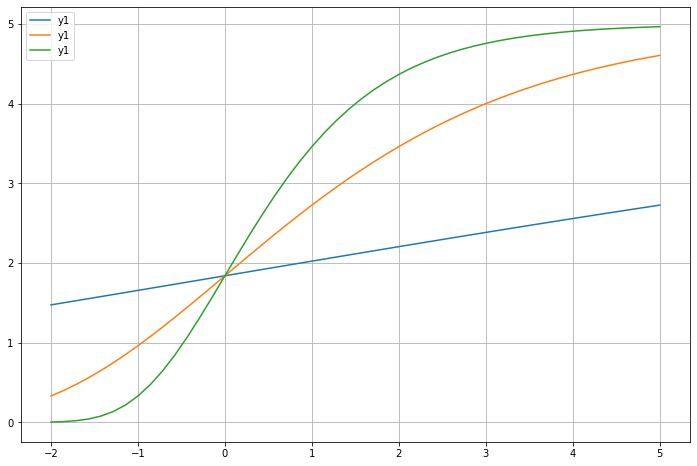

In [34]:
x = np.linspace(start = -2, stop = 5, num = 50)
y1 = Gompertz(x, theta1 = 5, theta2 = 1, theta3 = 0.1)
y2 = Gompertz(x, theta1 = 5, theta2 = 1, theta3 = 0.5)
y3 = Gompertz(x, theta1 = 5, theta2 = 1, theta3 = 1)

plt.figure(figsize = (12, 8))
plt.plot(x, y1, label = 'y1')
plt.plot(x, y2, label = 'y1')
plt.plot(x, y3, label = 'y1')
plt.legend()
plt.grid()
plt.show()

## Example: 'Korea, South '

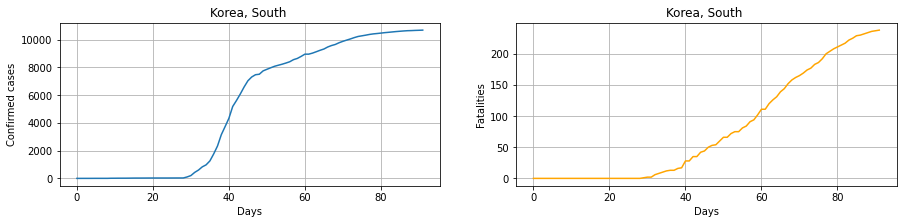

In [35]:
country = 'Korea, South '
train = train_dataset[train_dataset['Country_Region'] == country]
test = test_dataset[test_dataset['Country_Region'] == country]

# X_train
x_train = train.Day.values
confirmed_train = train.ConfirmedCases.values
fatalities_train = train.Fatalities.values

# X_test
x_test = test.Day.values
country_plot(country)

## **Least-Squared-Estimation**: scipy.optimize.curve_fit

In [36]:
popt_confirmed, pcov_confirmed = curve_fit(f = Gompertz, 
                                           xdata = x_train, 
                                           ydata = confirmed_train, 
                                           p0 = [3 * max(confirmed_train), 1, 1], 
                                           maxfev = 800)

In [37]:
popt_confirmed

array([1.02636607e+04, 1.22880659e+02, 1.22536262e-01])

In [38]:
pcov_confirmed

array([[ 5.87095162e+03, -9.41749897e+02, -2.12312189e-01],
       [-9.41749897e+02,  5.18825726e+02,  1.04470955e-01],
       [-2.12312189e-01,  1.04470955e-01,  2.14965388e-05]])

In [39]:
def curve_plot(x_train, y_train, x_test, est):
    plt.figure(figsize = (12, 5))
    plt.xlabel('Days')
    plt.ylabel('Cases')
    plt.title(country)
    plt.scatter(x_train, y_train, color = 'r')
    plt.plot(x_train, Gompertz(x_train, *est), label = 'Fitting curve (train)')
    plt.plot(x_test, Gompertz(x_test, *est), label = 'Fitting curve (test)')
    plt.axvline(x = test_start, color = 'r', linestyle = ':', label = 'test_start = %.f' % (test_start))
    plt.axvline(x = train_end, color = 'b', linestyle = ':', label = 'train_end = %.f' % (train_end))
    plt.legend()
    plt.show()

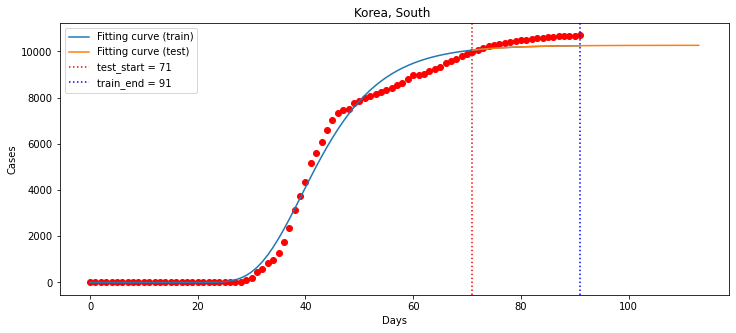

In [40]:
curve_plot(x_train = x_train, y_train = confirmed_train, x_test = x_test, est = popt_confirmed)

In [41]:
popt_fatalities, pcov_fatalities = curve_fit(f = Gompertz, 
                                             xdata = x_train, 
                                             ydata = fatalities_train, 
                                             p0 = [3 * max(fatalities_train), 1, 1], 
                                             maxfev = 800)

In [42]:
popt_fatalities

array([3.11558345e+02, 1.66766631e+01, 4.65148105e-02])

In [43]:
pcov_fatalities

array([[ 2.16268774e+01, -2.87148197e+00, -4.22998870e-03],
       [-2.87148197e+00,  4.98432924e-01,  6.68374400e-04],
       [-4.22998870e-03,  6.68374400e-04,  9.28957915e-07]])

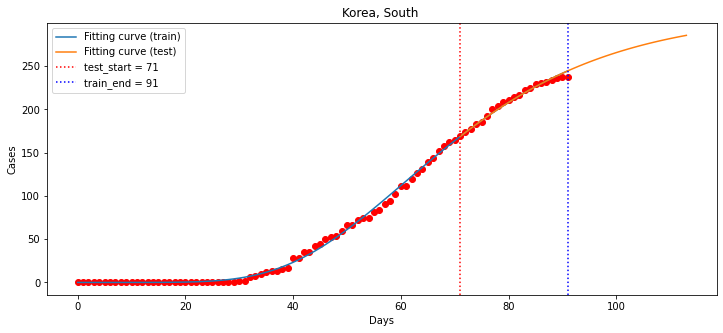

In [44]:
curve_plot(x_train = x_train, y_train = fatalities_train, x_test = x_test, est = popt_fatalities)

## **Minimized loss function:** scipy.optimize.minimize

Consider the nonlinear regression model

$$y_{i} = f(t_{i};\theta) + \varepsilon_{i},\quad  i=1, 2, ..., n$$

The function is given by

$$f(t;\theta) = \theta_{1} e^{-\theta_{2} e^{-\theta_{3} t}}$$

, where $\theta_{1} > 0$, $\theta_{2} > 0$, $\theta_{3} > 0$.

The estimator $(\hat{\theta}_{1}, \hat{\theta}_{2}, \hat{\theta}_{3})$ is obtained by minimizing loss function

$$L(\theta) = \frac{1}{n} \sum_{i=1}^{n} [y_{i} - f(t_{i};\theta)]^{2}$$

In [45]:
# Minimize the Loss function: MSE
def growth_curve(x, y):
    # Loss function
    def l_fun(params): 
        theta1 = np.exp(params[0])
        theta2 = np.exp(params[1])
        theta3 = np.exp(params[2])
        mse = np.mean((y - Gompertz(x, theta1, theta2, theta3)) ** 2)
        return mse

    p0 = [np.log(3 * max(y)), 0, 0]
    res = minimize(fun = l_fun, x0 = p0, method = 'L-BFGS-B')
    mse = res.fun

    # convergence_res
    convergence_res = {'MSE': mse,
                       'nfev': res.nfev, 
                       'nit': res.nit, 
                       'status': res.status}

    # Estimator
    est = np.exp(res.x)
    return est, convergence_res

In [46]:
# Confirmed cases
est_confirmed, convergence_res = growth_curve(x = x_train, y = confirmed_train)
convergence_res

{'MSE': 123362.9528076106, 'nfev': 188, 'nit': 32, 'status': 0}

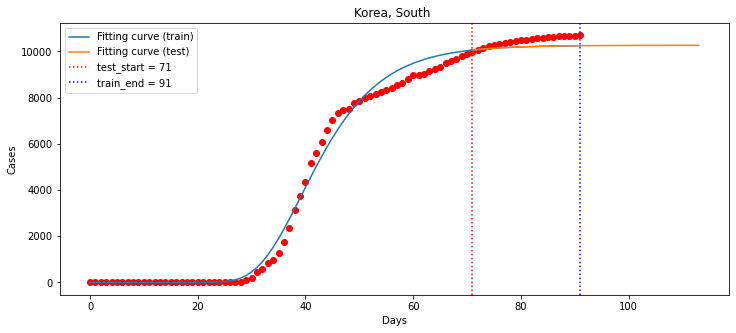

In [47]:
curve_plot(x_train = x_train, y_train = confirmed_train, x_test = x_test, est = est_confirmed)

In [48]:
# Confirmed cases
est_fatalities, convergence_res = growth_curve(x = x_train, y = fatalities_train)
convergence_res

{'MSE': 8.409182556201152, 'nfev': 196, 'nit': 34, 'status': 0}

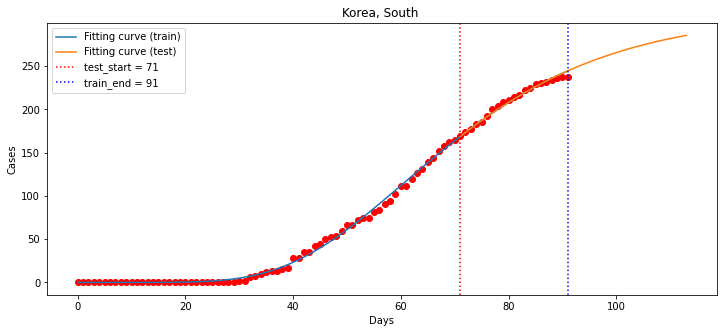

In [49]:
curve_plot(x_train = x_train, y_train = fatalities_train, x_test = x_test, est = est_fatalities)

## Submission

In [50]:
confirmed_pred = np.zeros(len(test_dataset))
fatalities_pred = np.zeros(len(test_dataset))

In [51]:
for country in country_list:
    train = train_dataset[train_dataset['Country_Region'] == country]
    test = test_dataset[test_dataset['Country_Region'] == country]
    
    # X_train
    x_train = train.Day.values
    confirmed_train = train.ConfirmedCases.values
    fatalities_train = train.Fatalities.values
    
    # X_test
    x_test = test.Day.values

    # Confirmed cases
    confirmed_est, confirmed_convergence = growth_curve(x = x_train, y = confirmed_train)
    
    # Fatalities    
    fatalities_est, fatalities_convergence = growth_curve(x = x_train, y = fatalities_train)
    
    # Predictions
    confirmed_pred[test_dataset.Country_Region == country] = Gompertz(x_test, *confirmed_est)
    fatalities_pred[test_dataset.Country_Region == country] = Gompertz(x_test, *fatalities_est)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:

In [52]:
submission['ConfirmedCases'] = confirmed_pred
submission['Fatalities'] = fatalities_pred

In [53]:
submission.to_csv('submission.csv', index = False)